In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

**Exercise 1.1**

In [2]:
def scores_and_labels(english, tagalog):
    with open(english, 'r') as eng, open(tagalog, 'r') as tag:       
        eng_scores = eng.read().splitlines()         
        tag_scores = tag.read().splitlines()

    eng_scores = [float(x) for x in eng_scores] 
    eng_labels = [0] * len(eng_scores) # class 0 (self)    
    tag_scores = [float(x) for x in tag_scores] 
    tag_labels = [1] * len(tag_scores) # class 1 (foreign)

    anomaly_scores = eng_scores + tag_scores
    anomaly_labels = eng_labels + tag_labels
    return anomaly_scores, anomaly_labels

In [40]:
def plot_ROC(fpr, tpr, title="", filename=None):
    auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], '--')
    plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve ' + title)
    plt.legend()
    if filename:
        plt.savefig(f'figures/{filename}')
    plt.show()

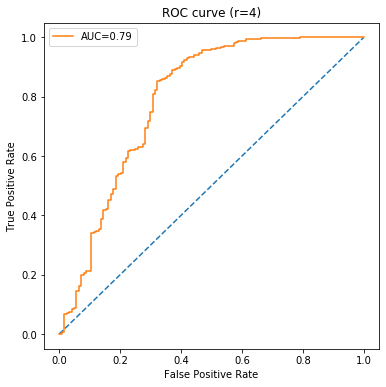

In [41]:
# english.test
english = "lang-matches/english-matches.txt"
# tagalog.test
tagalog = "lang-matches/tagalog-matches.txt"

anomaly_scores, anomaly_labels = scores_and_labels(english, tagalog)
fpr, tpr, thresholds = metrics.roc_curve(anomaly_labels, anomaly_scores, pos_label=1)
plot_ROC(fpr, tpr, "(r=4)", "ex1_1.png")

**Exercise 1.2**

In [11]:
def get_AUC(english, tagalog):
    anomaly_scores, anomaly_labels = scores_and_labels(english, tagalog)
    fpr, tpr, thresholds = metrics.roc_curve(anomaly_labels, anomaly_scores, pos_label=1)
    return metrics.auc(fpr, tpr)

In [5]:
def negsel_r(n, lang):
    """Run negative selection algorithm for all r <= n."""
    negsel = "negative-selection"
    for r in range(1, n+1):
        !java -jar {negsel}/negsel2.jar -self {negsel}/english.train -n 10 -r {r} -c -l < {negsel}/{lang}.test > lang-matches/{lang}-matches-r{r}.txt

In [6]:
# negsel_r(10, 'english')
# negsel_r(10, 'tagalog')

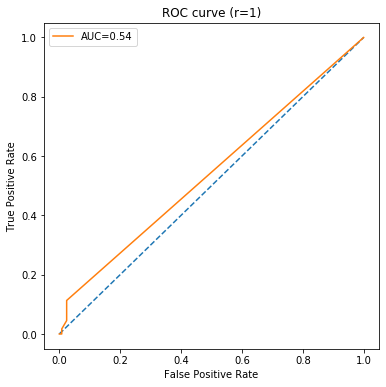

In [42]:
# english.test
english = "lang-matches/english-matches-r1.txt"
# tagalog.test
tagalog = "lang-matches/tagalog-matches-r1.txt"

anomaly_scores, anomaly_labels = scores_and_labels(english, tagalog)
fpr, tpr, thresholds = metrics.roc_curve(anomaly_labels, anomaly_scores, pos_label=1)
plot_ROC(fpr, tpr, "(r=1)", "ex1_2_r1.png")

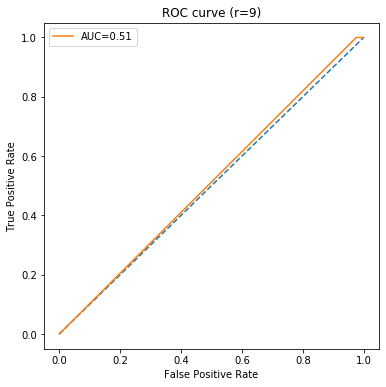

In [43]:
# english.test
english = "lang-matches/english-matches-r9.txt"
# tagalog.test
tagalog = "lang-matches/tagalog-matches-r9.txt"

anomaly_scores, anomaly_labels = scores_and_labels(english, tagalog)
fpr, tpr, thresholds = metrics.roc_curve(anomaly_labels, anomaly_scores, pos_label=1)
plot_ROC(fpr, tpr, "(r=9)", "ex1_2_r9.png")

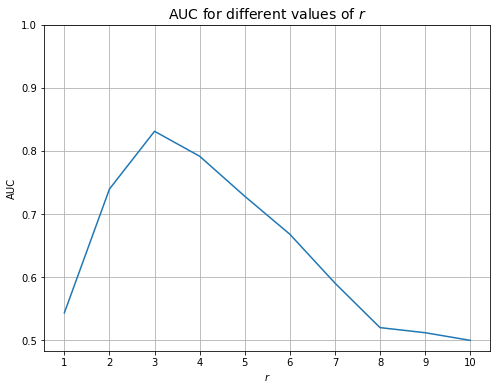

In [44]:
n = 10
r_range = range(1, n+1)
matches = "lang-matches/%s-matches-r%d.txt"

AUCs = []
for r in r_range:
    eng = matches % ("english", r)
    tag = matches % ("tagalog", r)
    AUCs.append( get_AUC(eng, tag) )

plt.figure(figsize=(8, 6))
plt.plot(r_range, AUCs)
plt.xlabel("$r$")
plt.ylabel("AUC")
plt.title("AUC for different values of $r$", size=14)
plt.xticks(r_range)
plt.ylim(top=1)
plt.grid()
plt.savefig("figures/ex1_2_r.png")
plt.show()